In [30]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [33]:
# Combine all tag data files into a single dataframe
all_tags_path = r'C:\Users\John\SynologyDrive\JOBS\~2019\QEJ19152\DATA ANALYSIS\MOVEMENT_ECOLOGY\MASTER_DATA\ART_DATA\All_TAGS'

# List to hold dataframes
all_dataframes = []

# Loop through each file in the folder
for filename in os.listdir(all_tags_path):
    if filename.endswith('.xlsx') or filename.endswith('.xls'):
        # Construct full file path
        file_path = os.path.join(all_tags_path, filename)
        # Read the excel file and append to the list
        df = pd.read_excel(file_path)
        all_dataframes.append(df)

# Concatenate all dataframes
all_tags = pd.concat(all_dataframes, ignore_index=True)


In [34]:
tag_list_file = r"C:\Users\John\SynologyDrive\JOBS\~2019\QEJ19152\DATA ANALYSIS\MOVEMENT_ECOLOGY\MASTER_DATA\Tag_List.xlsx"

tag_list = pd.read_excel(tag_list_file)

In [37]:
# Create an empty dataframe to store the subset
filtered_all_tags = pd.DataFrame()

# Iterate through each unique TagID in the tag_list
for tag in tag_list['Report_Tag_ID'].unique():
    # Get the start and end datetime for the current TagID
    start_time = tag_list.loc[tag_list['Report_Tag_ID'] == tag, 'Start_Date'].values[0]
    end_time = tag_list.loc[tag_list['Report_Tag_ID'] == tag, 'End_Date'].values[0]

    # Create a mask to filter the predictions dataframe
    mask = (all_tags['TagID'] == tag) & (all_tags['DateAndTime'] >= start_time) & (all_tags['DateAndTime'] <= end_time)

    # Append the filtered data to the subset dataframe
    filtered_all_tags = pd.concat([filtered_all_tags, all_tags[mask]])

In [440]:
# Filter the DataFrame for rows where 'TagID' is specified
single_tag = filtered_all_tags[filtered_all_tags['TagID'] == 217]

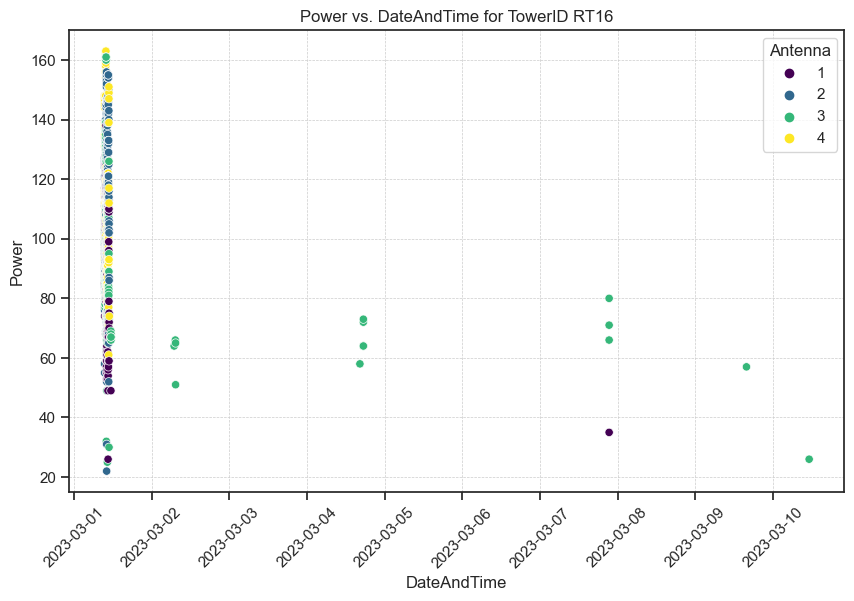

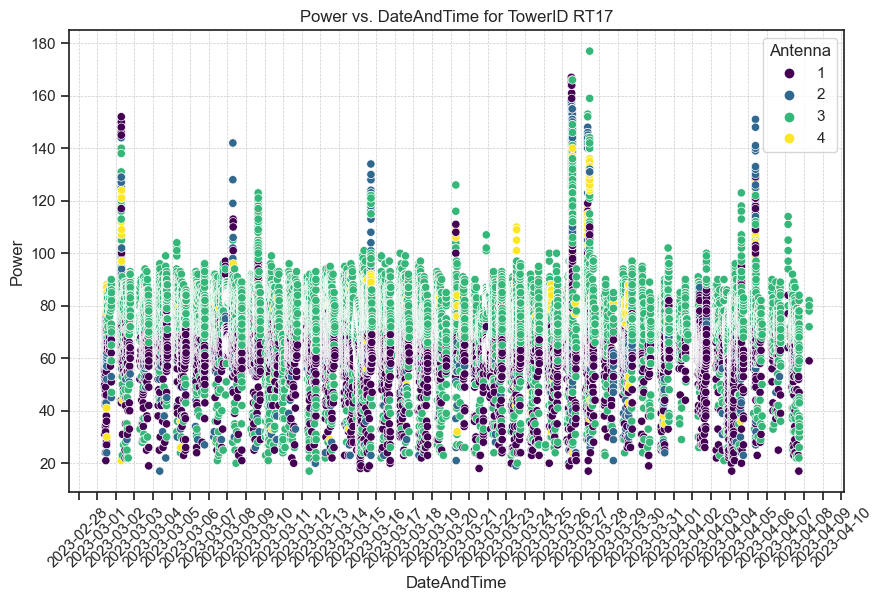

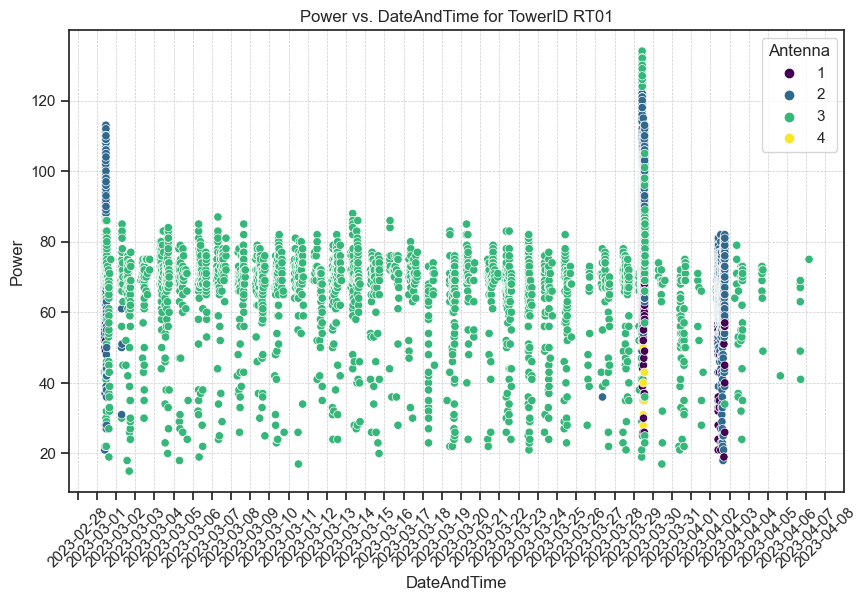

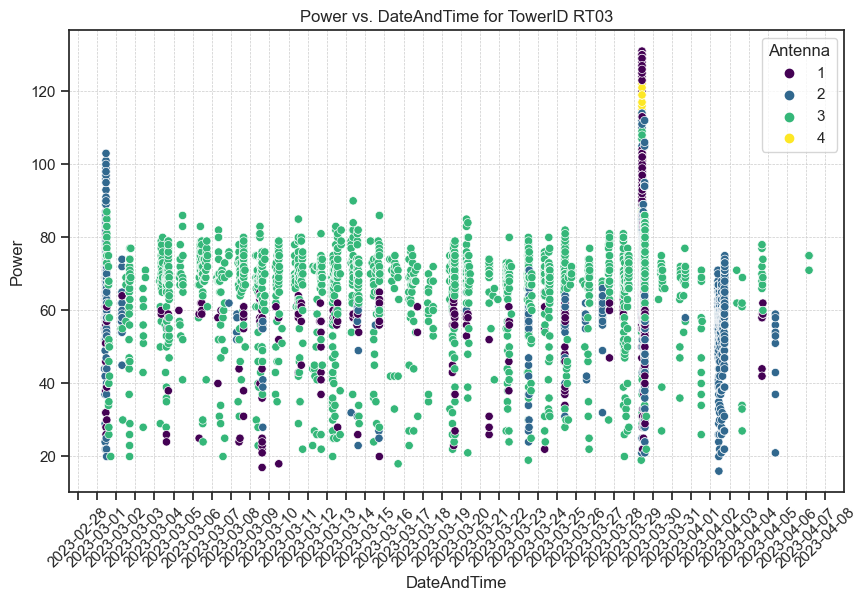

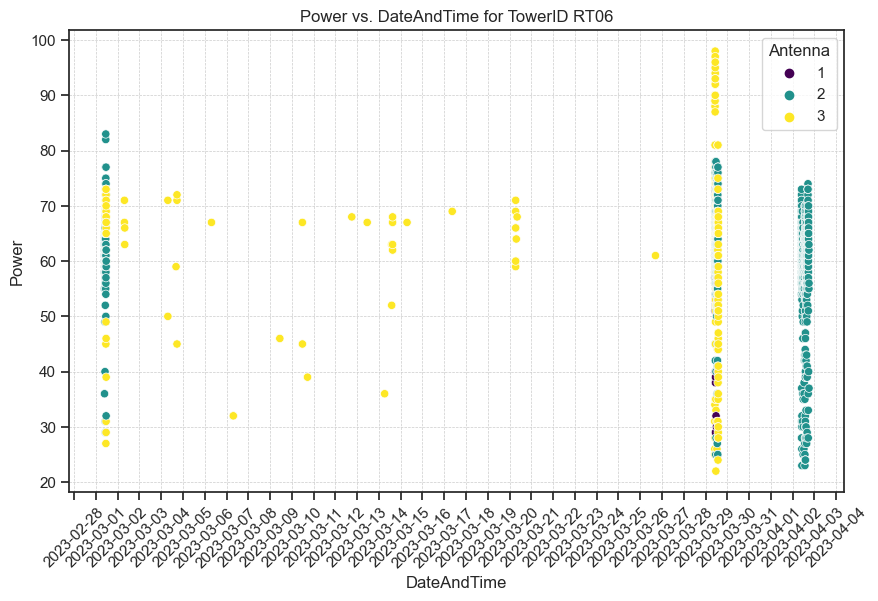

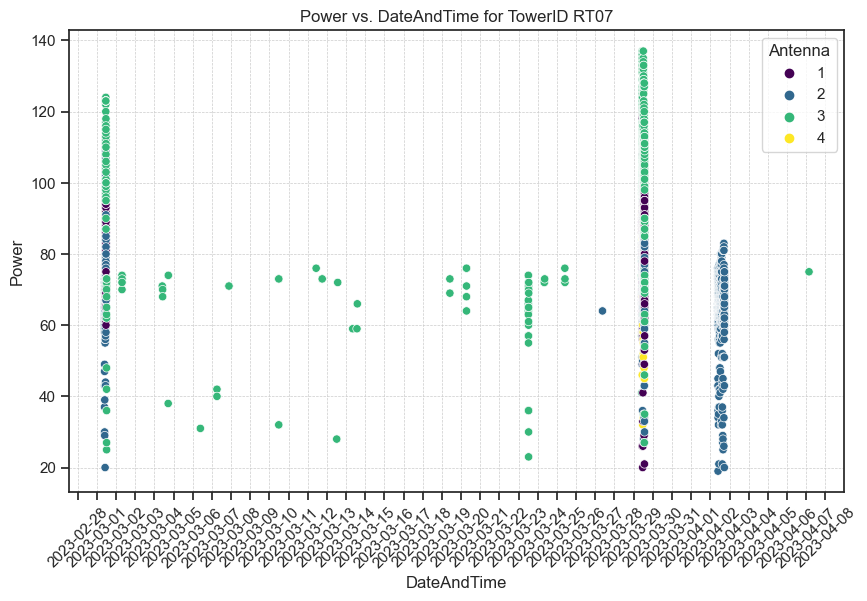

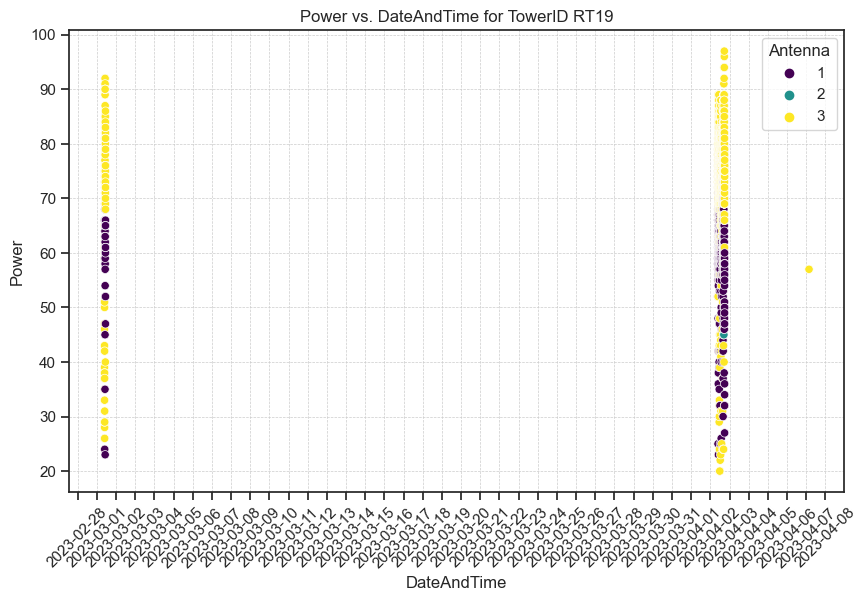

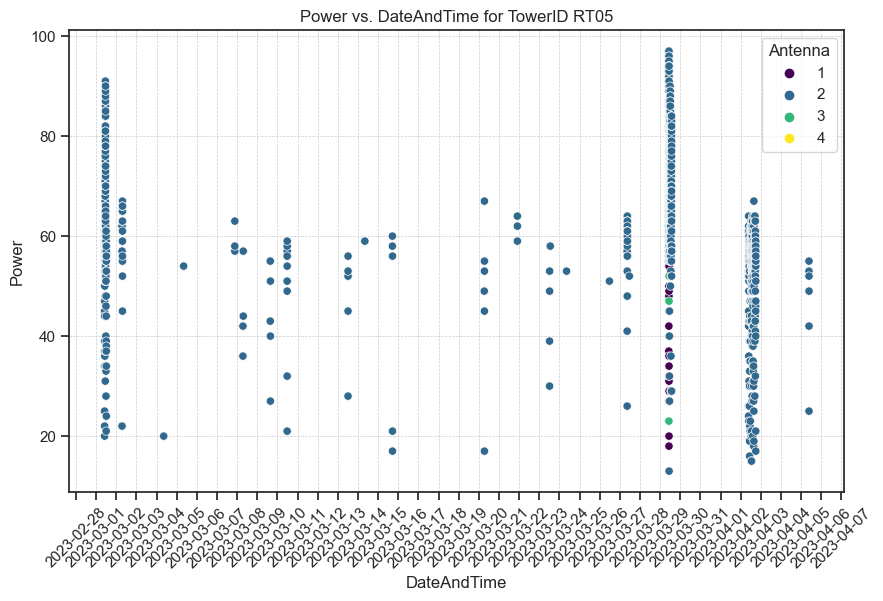

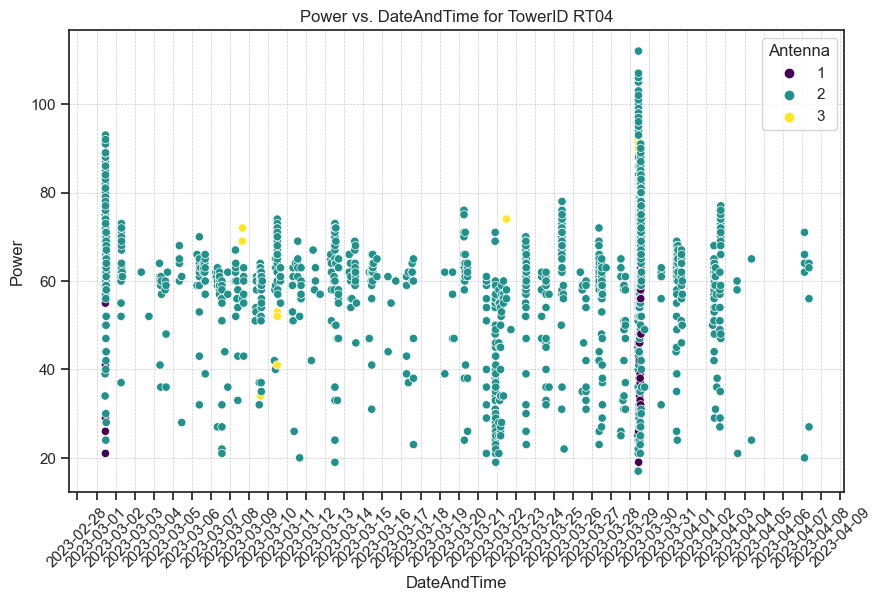

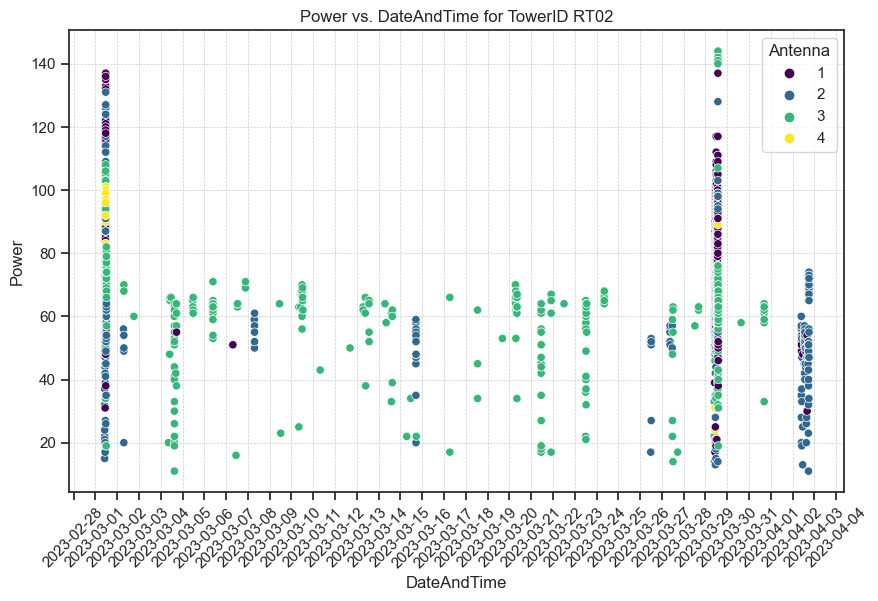

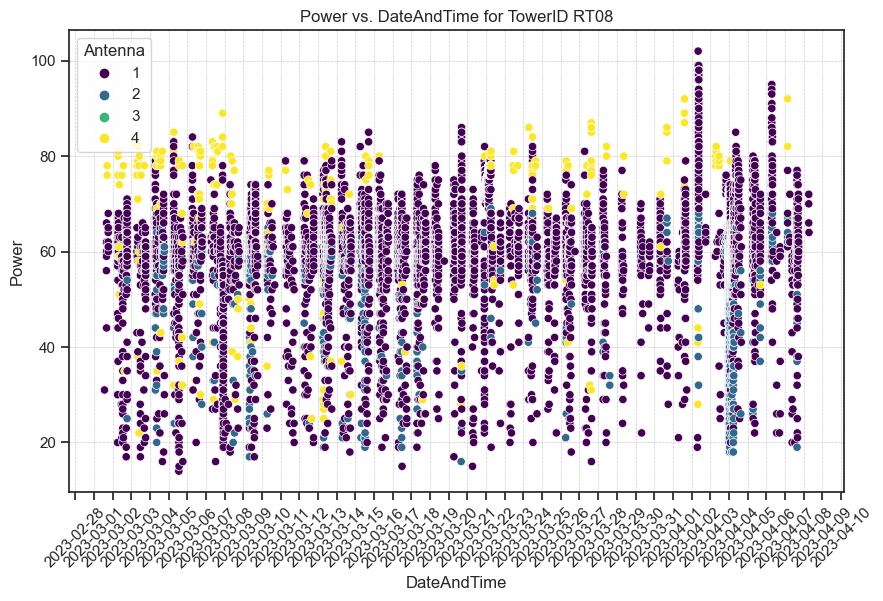

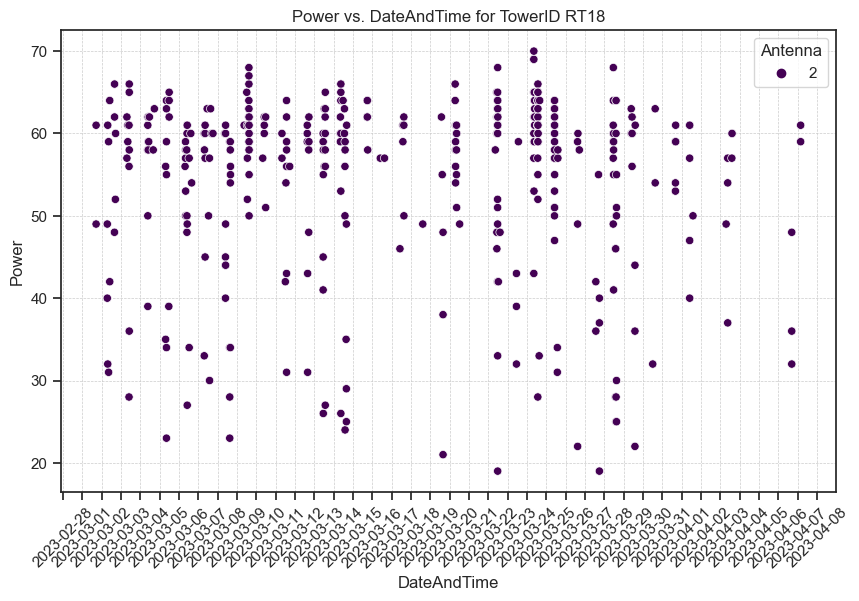

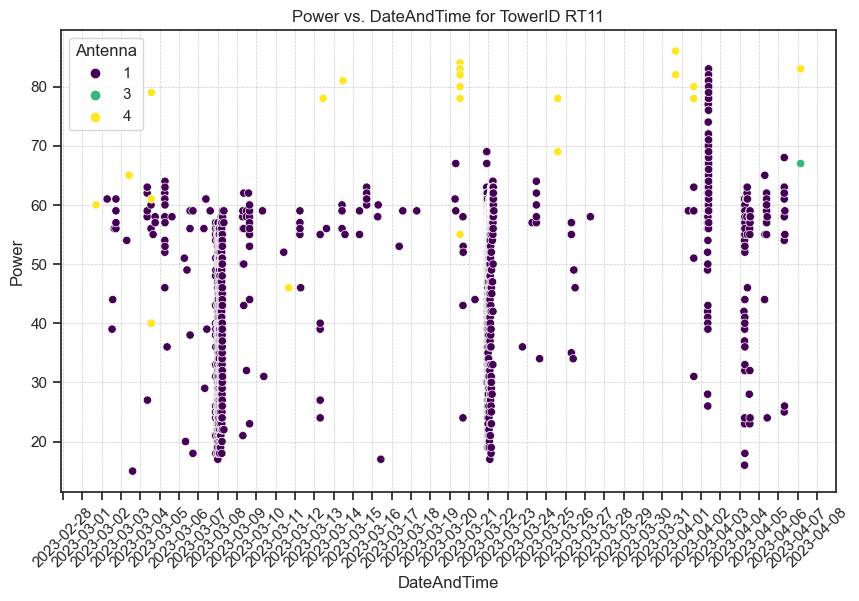

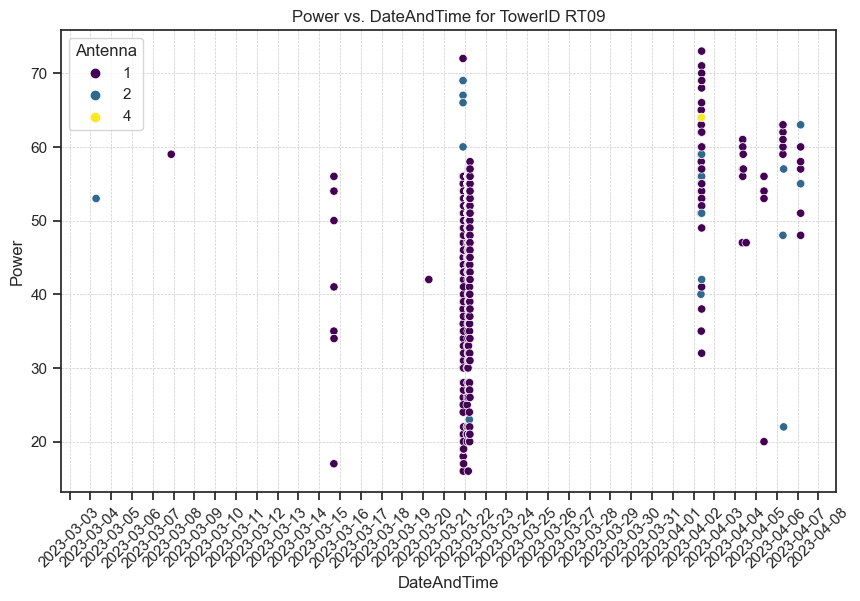

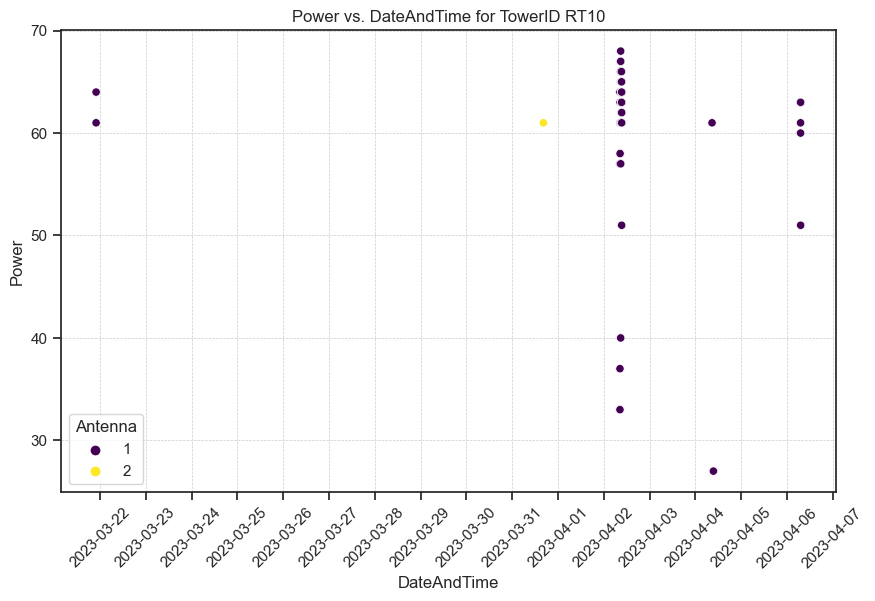

In [441]:
# Unique TowerIDs
tower_ids = single_tag['TowerID'].unique()

sns.set(style="ticks")

# Create a plot for each TowerID
for tower_id in tower_ids:
    # Filter the DataFrame for the specific TowerID
    tower_df = single_tag[single_tag['TowerID'] == tower_id]

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=tower_df, x='DateAndTime', y='Power', hue='Antenna', palette='viridis')

    # Adding title and labels
    plt.title(f'Power vs. DateAndTime for TowerID {tower_id}')
    plt.xlabel('DateAndTime')
    plt.ylabel('Power')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Set x-axis major ticks to each day
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.DayLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

    # Add gridlines
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Adjust the legend
    plt.legend(title='Antenna')
    
    # Show the plot
    plt.show()
